In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
X = digits['data']
y = digits['target']

In [5]:
X.shape

(1797, 64)

6


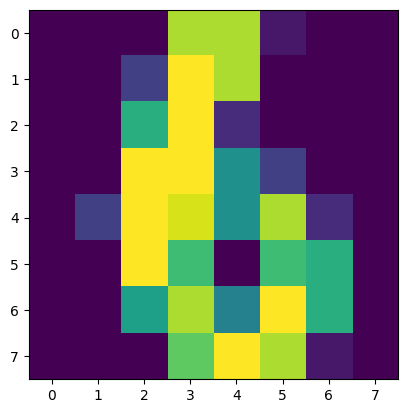

In [6]:
index = np.random.randint(0, X.shape[0])
print(y[index])
plt.imshow(np.reshape(X[index, :], (8, 8)));

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# First algorithm: Classification using mean value

In [10]:
centers = {}
for i in range(10):
    centers[i] = X_train[y_train==i, :].mean(axis=0)

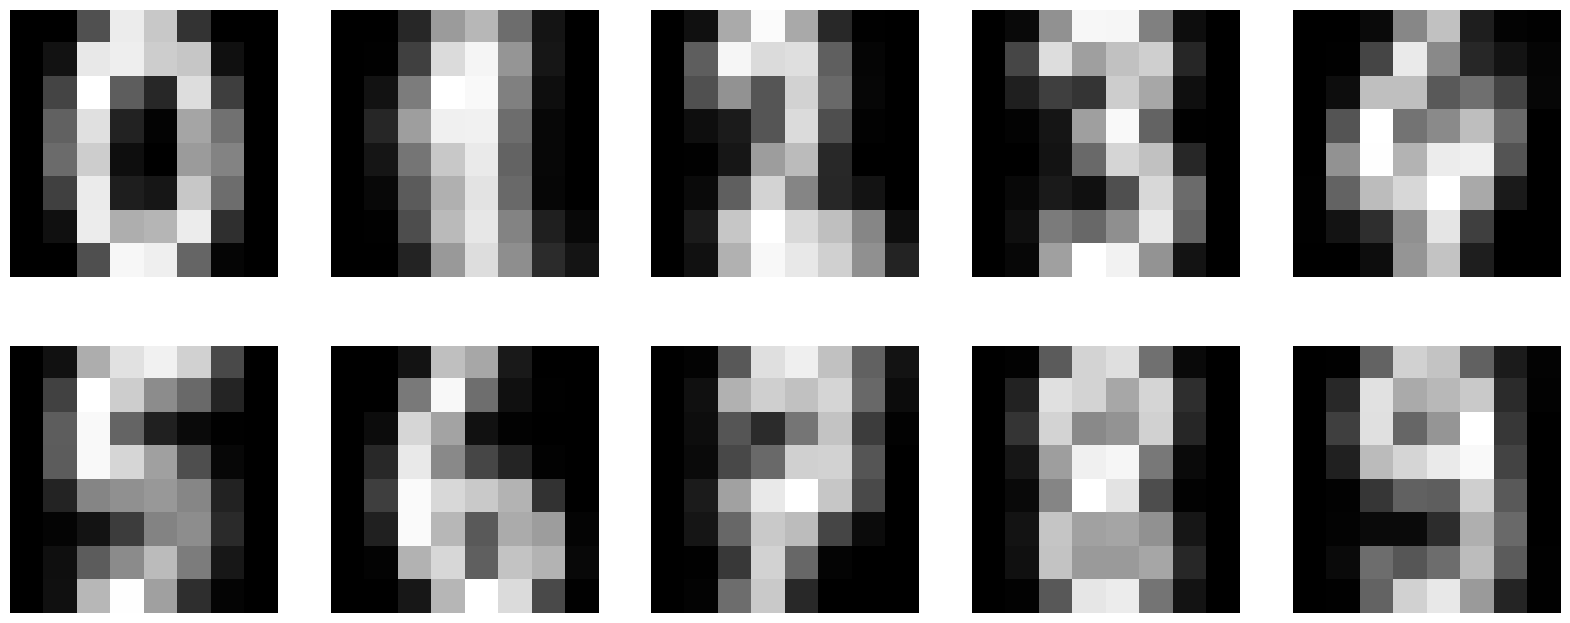

In [11]:
fig = plt.figure(figsize=(20, 8))

index = 0
for i in range(2):
    for j in range(5):
        ax = plt.subplot2grid((2, 5), (i, j))
        ax.imshow(np.reshape(centers[index], (8, 8)), cmap='gray');
        ax.axis('off')
        index += 1

In [12]:
def predict(centers, z):
    min_d = np.inf
    label = -1
    for i in range(10):
        d = np.linalg.norm(centers[i] - z)
        if d < min_d:
            label = i
            min_d = d
            
    return label

In [13]:
y_pred = []
for i in range(X_test.shape[0]):
    y_pred.append(predict(centers, X_test[i, :]))
    
y_pred = np.asarray(y_pred)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9092592592592592

# Second Algorithm: Classification with SVD

In [17]:
X_train.shape

(1257, 64)

In [21]:
class_mat = {}
for i in range(10):
    class_mat[i] = X_train[y_train==i, :].T

In [22]:
class_mat

{0: array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 6., 10.,  7., ...,  0.,  2.,  3.],
        ...,
        [ 8.,  4.,  3., ...,  6.,  5.,  8.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 1: array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 3.,  0.,  8., ...,  2.,  0.,  0.],
        ...,
        [ 0., 16., 16., ...,  0., 15., 16.],
        [ 0.,  7., 16., ...,  0.,  4.,  1.],
        [ 0.,  0., 16., ...,  0.,  0.,  0.]]),
 2: array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  1.,  1.],
        [ 7., 13., 12., ...,  8., 15., 12.],
        ...,
        [ 4., 16.,  9., ...,  7., 16., 12.],
        [ 6., 16.,  3., ...,  1., 16.,  7.],
        [ 1., 11.,  0., ...,  0.,  2.,  0.]]),
 3: array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  2.,  1.],
        [ 7.,  3., 10., ...,  9., 10., 10.]

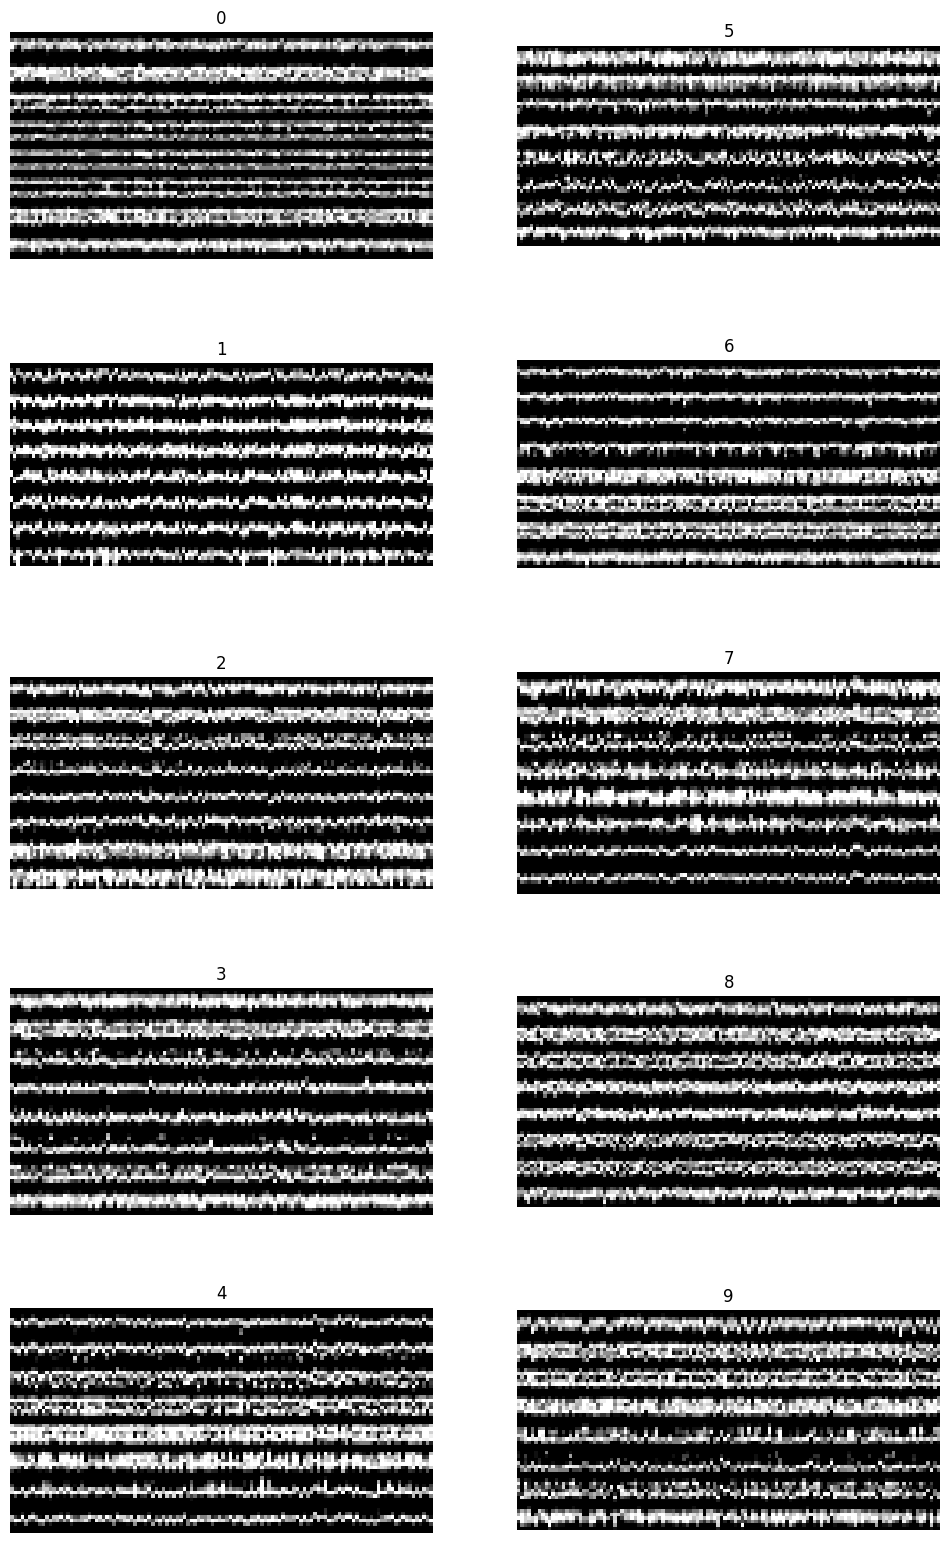

In [36]:
plt.figure(figsize=(12, 20))

index = 0
for i in range(2):
    for j in range(5):
        ax = plt.subplot2grid((5, 2), (j, i))
        ax.set_title(str(index))
        ax.imshow(class_mat[index], cmap='gray');
        ax.axis('off')
        index += 1

In [56]:
def svd_classifier(mat_class, X_test, k):
    I = np.eye(64)
    y_pred = []
    
    Uk = []
    for i in range(10):
        U, S, Vt = np.linalg.svd(class_mat[i])
        Uk.append(U)

    for n in range(X_test.shape[0]):
        min_d = np.inf
        label = -1
        z = X_test[n, :]
        for i in range(10):
            d = np.linalg.norm((I - Uk[i][:, :k] @ Uk[i][:, :k].T) @ z)

            if d < min_d:
                min_d = d
                label = i
        y_pred.append(label)
        
    return y_pred

In [58]:
K = []
ACC = []

for k in range(2, 65):
    acc = accuracy_score(y_true=y_test,
                         y_pred=svd_classifier(class_mat, X_test, k))
    K.append(k)
    ACC.append(acc)
    

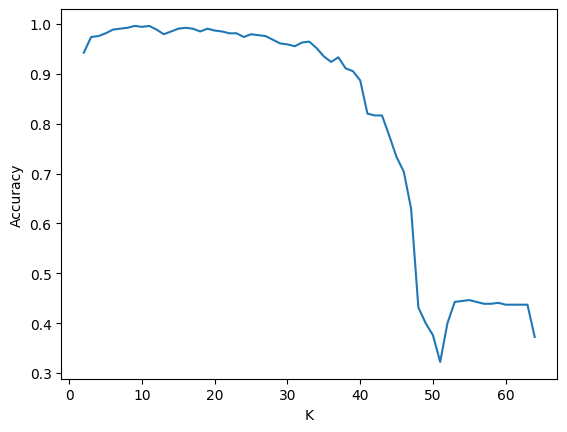

In [60]:
plt.plot(K, ACC)
plt.xlabel('K');
plt.ylabel('Accuracy');